<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/6_classical_machine_learning/1_intro_to_sklearn.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/6_classical_machine_learning/1_intro_to_sklearn.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is created by <a href='https://github.com/AmirMardan'> Amir Mardan</a>. For any feedback or suggestion, please contact me via <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<a name='top'></a>
# Introducing Scikit-Learn

[Scikit-learn](https://scikit-learn.org/stable/) is one of the best well-known Python packages for performing a wide range of machine learning algorithms.
Scikit-learn is characterized by its clean and uniform API.
This package is also well [documented](https://scikit-learn.org/stable/user_guide.html).




This notebook will cover the following topics:
- [1. Data Representation](#data_representation)
- [2. Models In Scikit-Learn](#models)
    - [Simple Linear Regression Example](#linear_regresion)
    - [Simple Classification Example](#classification)
    - [Simple Dimensionality Reduction Example](#dimensionality)
    - [Simple Clustering Example](#clustering)
- [3. Hyperparameters and Model Validation](#hyperparameters)
    - [Cross Validation](#cross_validation)
    - [Finding the Best Model](#best_model)
    - [Grid Search](#grid_Search)

<a id='data_representation'></a>
## 1. Data Representation

Machine learning is all about creating a model from data.
Hence it's better to first understand the structure of the data.
A table of dataset is a two-dimensional grid of data with rows as individual samples of the dataset and columns as the related quantities to each sample.

In [153]:
from sklearn import datasets


iris_dataset = datasets.load_iris(as_frame=True)
iris = iris_dataset.frame
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- *Sample* &#8594; each row of the dataset, (`n_samples`).
- *Feature* &#8594; each column of the dataset (`n_fatures`).

We can store all the features in a matrix, *features matrix*, which is by convention called `X`.
The label can be stored in a *target array* which is usually called `y`. 

- **siz of `X`** &#8594; (`n_samples`, `n_fatures`)
- **siz of `y`** &#8594; (`n_samples`, `n_targets`)

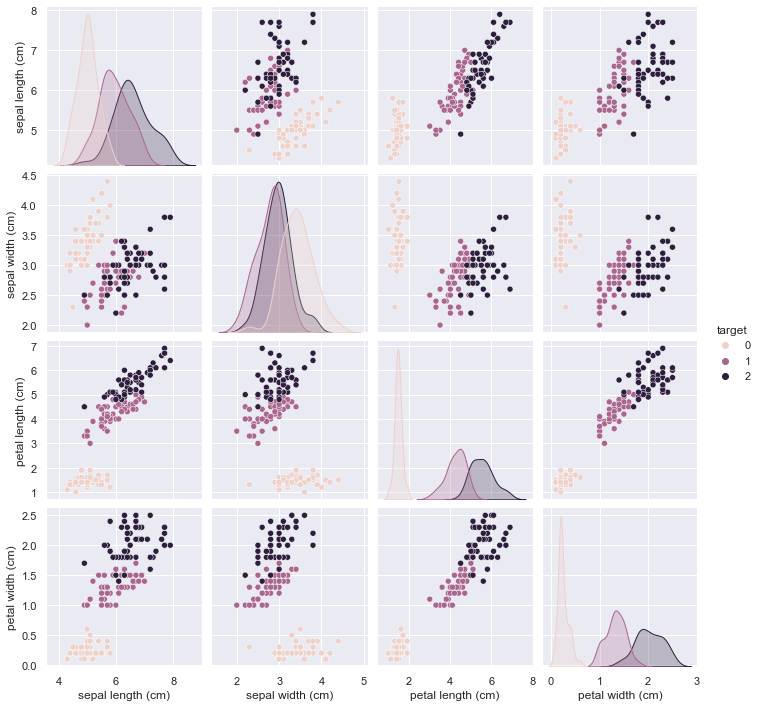

In [154]:
import seaborn as sns

sns.set_theme()
sns.pairplot(iris, hue='target')

In [155]:
X_iris = iris.drop(columns=['target'])
y_iris = iris['target']


print('X: ', X_iris.shape)
print('y: ', y_iris.shape)

X:  (150, 4)
y:  (150,)


<a id='models'></a>
## 2. Models In Scikit-Learn

Consistency is one of the main properties of Scikit-learn.
Usually, Scikit-learn estimator API can be used as follows:
1. Choose a class of model and import the appropriate estimator
2. Choose the model hyperparameters
3. Fit the model using `.fit()`
4. Apply the model to new data 
5. Evaluate the accuracy

<a id='linear_regresion'></a>
### 2.1 Simple Linear Regression Example

As the first example, we perform a simple linear regression using Scikit-learn.

[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [156]:
# Let's import some basic packages and generate the data

import matplotlib.pyplot as plt 
import numpy as np

rng = np.random.RandomState(10)

X = 10 * rng.rand(100, 1)
y = rng.randn(100, 1) + 4 * X

X_test = np.linspace(-1, 11)
X_test = X_test[:, np.newaxis]


1. Choose a class of model and import the appropriate estimator


In [157]:
from sklearn.linear_model import LinearRegression

2. Choose the model hyperparameters


In [158]:
model = LinearRegression(fit_intercept=True)

3. Fit the model using `.fit()`


In [159]:
model.fit(X, y)

LinearRegression()

4. Apply the model to new data 

In [160]:
y_predict = model.predict(X_test)


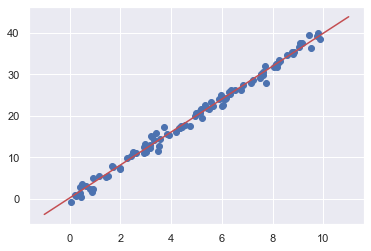

In [161]:
plt.scatter(X, y)
ax = plt.plot(X_test, y_predict, 'r')

<a id='classification'></a>
### 2.2 Simple Classification Example

Let's solve a classification problem.
For this example, I use [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussian%20naive%20bayes#sklearn.naive_bayes.GaussianNB).



First, we need to prepare the data.

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris,
                                                    test_size=0.2, random_state=1)

print('Train: ', X_train.shape)
print('Train: ', X_test.shape)

Train:  (120, 4)
Train:  (30, 4)


In [163]:
 # Tool for measuring accuracy
from sklearn.metrics import accuracy_score, confusion_matrix 

from sklearn.naive_bayes import GaussianNB       # 1. Choose a class of model and import the appropriate estimator
model = GaussianNB()                             # 2. Choose the model hyperparameters
model.fit(X_train, y_train)                      # 3. Fit the model using `.fit()`
y_predict = model.predict(X_test)                # 4. Apply the model to new data 
accuracy_score(y_test, y_predict)                # 5. Evaluate the accuracy


0.9666666666666667

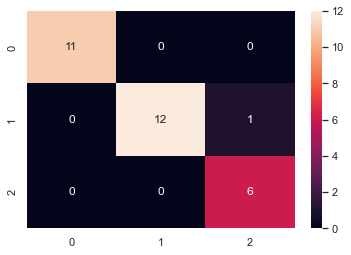

In [164]:
ax = sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)


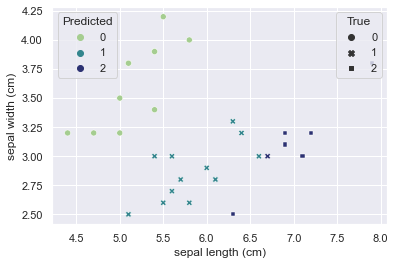

In [165]:
ax = sns.scatterplot(x=X_test.iloc[:, 0],
                y=X_test.iloc[:, 1],
                hue=y_predict,
                palette='crest',
                style=y_test
                )

h,l = ax.get_legend_handles_labels()
l1 = ax.legend(h[:int(len(h)/2)],l[:int(len(l)/2)],
               loc='upper left',
               title='Predicted'
               )
l2 = ax.legend(h[int(len(h)/2):],l[int(len(l)/2):],
               loc='upper right',
               title='True')
ax.add_artist(l1); 


<a id='dimensionality'></a>
### 2.3 Simple Dimensionality Reduction Example

Dimensionality reduction is about seeing whether there is a suitable lower dimensional representation that preserves the important features of data.

In [166]:
from sklearn.decomposition import PCA       # 1. Choose a class of model and import the appropriate estimator
model = PCA(n_components=2)                 # 2. Choose the model parameters
model.fit(X_iris)                           # 3. Fit the model using `.fit()`
x_2d = model.transform(X_iris)              # 4. Apply the model to new data 


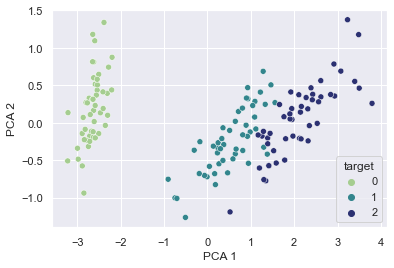

In [167]:
iris['PCA1'] = x_2d[:, 0]
iris['PCA2'] = x_2d[:, 1]

ax = sns.scatterplot(x=x_2d[:, 0], y=x_2d[:, 1], hue=y_iris,
                palette='crest'
           )
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2');  

<a id='clustering'></a>
### 2.4 Simple Clustering Example

In [168]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(iris)
labels = model.predict(iris)

In [169]:
X_iris.iloc[:, 1].shape

(150,)

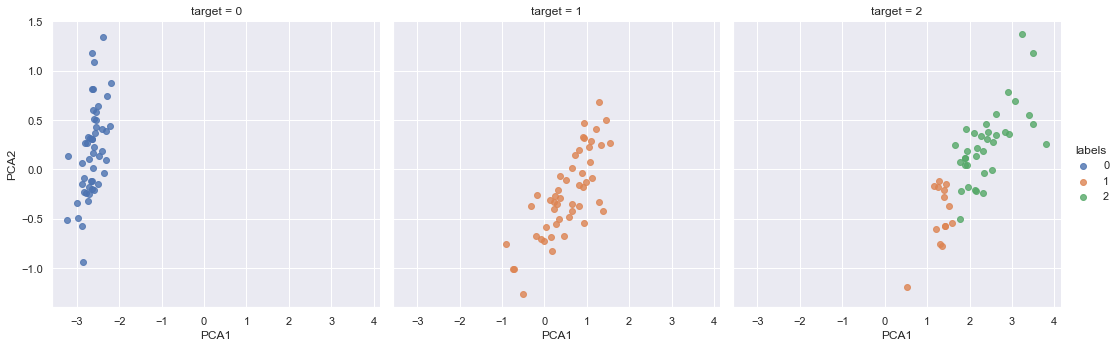

In [170]:
iris['labels'] = labels

ax = sns.lmplot(data=iris, x='PCA1', y='PCA2',
                hue='labels', col='target',
                fit_reg=False)


<a id='hyperparameters'></a>
## 3. Hyperparameters and Model Validation

Choosing the class of model and hyperparameters is significantly important. 
To solve a problem, models should be tested using different hyperparameters.
In this way, we can specify the appropriate hyperparameters. 
The *model validation* is carried out using a *holdout set*. It means, we hide a subset of data from the model during the training and it's used to test the model.
As you might have noticed, this can be done using 

```Python
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size)
```

In [171]:
iris = datasets.load_iris(as_frame=True)
iris = iris.frame

X_iris = iris.drop(columns='target')
y_iris = iris['target']

X2, X1, y1, y2 = train_test_split(X_iris, y_iris, 
                                  train_size=0.5,
                                  random_state=0)  

<a id='cross_validation'></a>
### 3.1 Cross Validation

Now, we can train the model using the first half of the dataset and validate it using the other half. 
This is called *cross-validation* and by dividing the dataset into 2 parts, we are measuring *two-fold cross-validation**.


In [172]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

model1 = GradientBoostingClassifier()
model1 = model1.fit(X1, y1)

model2 = GradientBoostingClassifier()
model2 = model2.fit(X2, y2)

accuracy = accuracy_score(model1.predict(X2), y2), accuracy_score(model2.predict(X1), y1)

accuracy

(0.41333333333333333, 0.32)

Then we can calculate the average of both situations.

In [173]:
np.mean(accuracy)

0.3666666666666667

This can be done for even higher folds using `cross_val_predict`.

In [174]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model1, X_iris, y_iris, cv=5)
score.mean()

0.9600000000000002

<a id='best_model'></a>
### 3.2 Finding the Best Model

Now, we know how to measure the efficiency of our model.
Assuming the performance of the models is not appropriate, then what are our options?
- Changing the complexity of the model,
- Increasing the number of samples in the dataset,
- Increasing the number of features in the dataset.

Finding the best model is about the trade-off between *bias* and *variance*.

<center>
<img src='./img/bias_variance.png' width='400px' alt='bias-variance'>
</center>

In the left, we have high bias (*underfitting*) while in the right the model suffers from high variance (*overfitting*).
Of course, neither of these models is good.

**High bias** &#8594; Similar performance on the training and validation sets.

**High variance** &#8594; Performance on the validation set is way worse than the training set.

<center>
<img src='./img/biasvariance.png' width='400px' alt='opt_variance_bias'>
</center>

<a id='grid_Search'></a>
### 3.3 Grid Search

Scikit-learn provides tools to find the best hyperparameters for a model.
Here `grid_search` is used to find the best hyperparameters for gradient boosting classifier. 

In [180]:
from sklearn.model_selection import GridSearchCV

param_grid = {  # Hyperparameters to be analyzed
    'learning_rate': [0.05, 0.1, 0.5],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, 
                                  train_size=0.9,
                                  random_state=0) 


grid.fit(X_train, y_train) 



GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]})

The best hyperparameters are:

In [189]:
grid.best_params_


{'learning_rate': 0.05, 'n_estimators': 50}

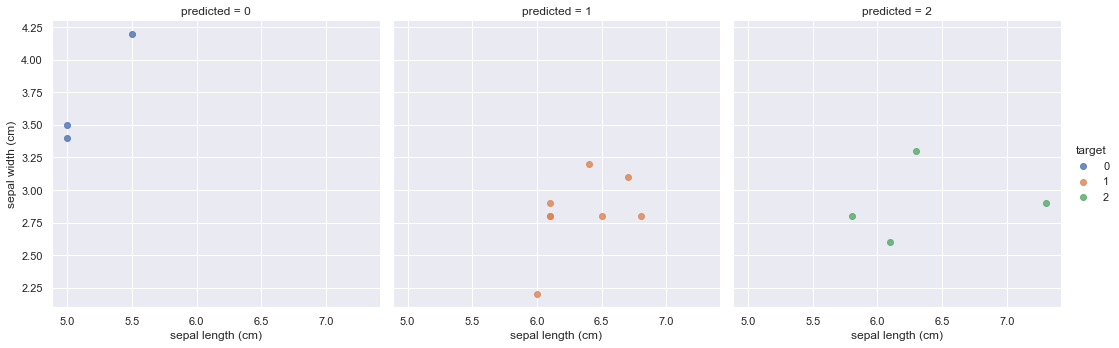

In [196]:
model = grid.best_estimator_

df_test = X_test.join(y_test)
df_test['predicted'] = model.predict(X_test)

sns.lmplot(data=df_test, x='sepal length (cm)', y='sepal width (cm)',
           hue='target', col='predicted',
           fit_reg=False)

In [197]:
accuracy_score(y_test, model.predict(X_test))

1.0

### [TOP ☝️](#top)